In [ ]:
#Bitcoin Prediction with LSTM

In [1]:
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 6.1 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import yfinance as yf
df = yf.download("BTC-USD", period="1y")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031
2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480
2021-01-09,40788.640625,41436.351562,38980.875000,40254.546875,40254.546875,61984162837
2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690
...,...,...,...,...,...,...
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362


In [6]:
df.shape

(365, 6)

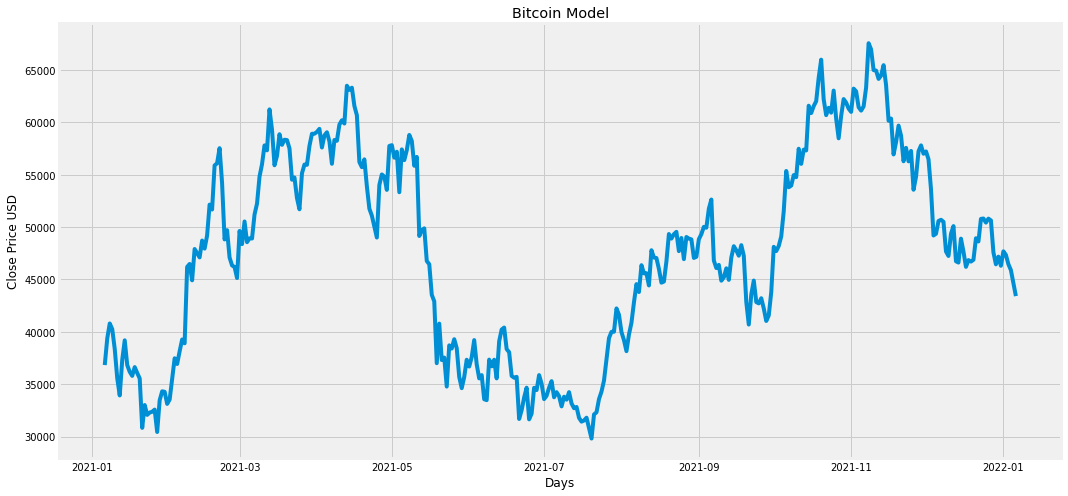

In [9]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [10]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

292

In [13]:
#Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.18583454],
       [0.25327931],
       [0.29105966],
       [0.27667751],
       [0.2264092 ],
       [0.15252616],
       [0.1089955 ],
       [0.19886428],
       [0.24841392],
       [0.18586113],
       [0.16872036],
       [0.15847489],
       [0.1806891 ],
       [0.16585125],
       [0.15202546],
       [0.02696943],
       [0.08470493],
       [0.05986033],
       [0.06573266],
       [0.06777225],
       [0.07316049],
       [0.01655741],
       [0.0968962 ],
       [0.11941475],
       [0.11817365],
       [0.08758096],
       [0.09877859],
       [0.15103337],
       [0.20298855],
       [0.18852798],
       [0.2207912 ],
       [0.25049773],
       [0.24089563],
       [0.4340398 ],
       [0.44157805],
       [0.40018654],
       [0.47940237],
       [0.46869034],
       [0.45811456],
       [0.50079983],
       [0.48034853],
       [0.51358025],
       [0.59168346],
       [0.57925715],
       [0.69070826],
       [0.6963065 ],
       [0.7344539 ],
       [0.646

In [15]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.18583454, 0.25327931, 0.29105966, 0.27667751, 0.2264092 ,
       0.15252616, 0.1089955 , 0.19886428, 0.24841392, 0.18586113,
       0.16872036, 0.15847489, 0.1806891 , 0.16585125, 0.15202546,
       0.02696943, 0.08470493, 0.05986033, 0.06573266, 0.06777225,
       0.07316049, 0.01655741, 0.0968962 , 0.11941475, 0.11817365,
       0.08758096, 0.09877859, 0.15103337, 0.20298855, 0.18852798,
       0.2207912 , 0.25049773, 0.24089563, 0.4340398 , 0.44157805,
       0.40018654, 0.47940237, 0.46869034, 0.45811456, 0.50079983,
       0.48034853, 0.51358025, 0.59168346, 0.57925715, 0.69070826,
       0.6963065 , 0.7344539 , 0.64619461, 0.50363718, 0.52696658,
       0.45780566, 0.43783479, 0.43382762, 0.40600193, 0.52500443,
       0.49184047, 0.54902489, 0.49666521, 0.50636176, 0.50596658])]
[0.5667277061110585]

[array([0.18583454, 0.25327931, 0.29105966, 0.27667751, 0.2264092 ,
       0.15252616, 0.1089955 , 0.19886428, 0.24841392, 0.18586113,
       0.16872036, 0.15847489, 0.180

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train.shape

(232, 60)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(232, 60, 1)

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
232/232 [==============================] - 10s 30ms/step - loss: 0.0156
Epoch 2/5
232/232 [==============================] - 7s 30ms/step - loss: 0.0095
Epoch 3/5
232/232 [==============================] - 7s 29ms/step - loss: 0.0062
Epoch 4/5
232/232 [==============================] - 7s 29ms/step - loss: 0.0055
Epoch 5/5
232/232 [==============================] - 7s 29ms/step - loss: 0.0048


In [23]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [24]:
x_test = np.array(x_test)

In [25]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(73, 60, 1)

In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [29]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

963.5147688356165

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


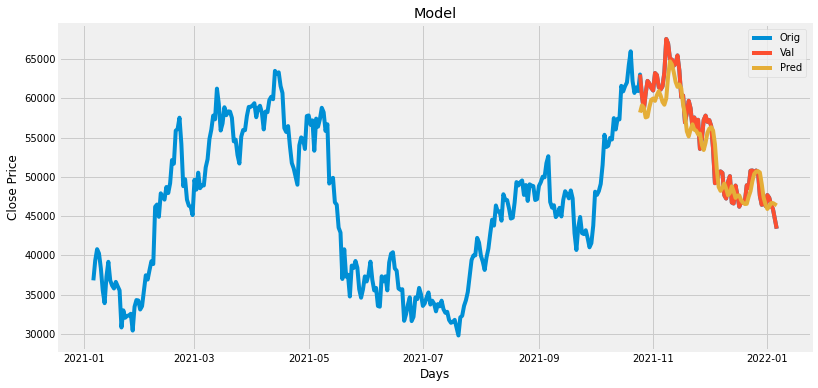

In [32]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()